In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes_data.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


<AxesSubplot: xlabel='Age', ylabel='Outcome'>

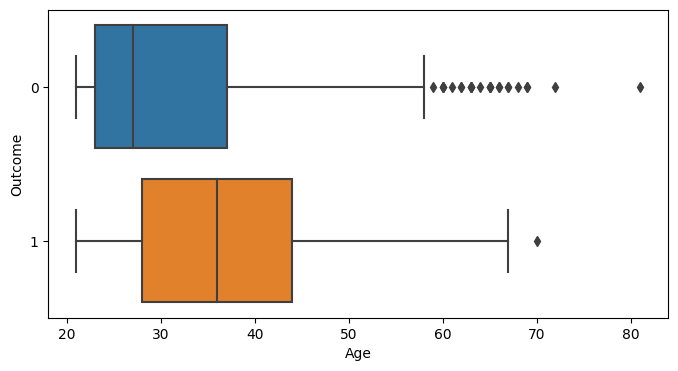

In [3]:
fig, axes = plt.subplots(figsize=(8, 4))

sns.boxplot(
    data,
    x='Age',
    y='Outcome',
    orient='h')

In [4]:
data_dupl = data.copy()

In [5]:
data_dupl.drop_duplicates(inplace=True)

In [6]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


In [7]:
list_to_drop = []
for col in data_dupl:
    top_freq = data_dupl[col].value_counts(normalize=True).max()
    nunique_ratio = data_dupl[col].nunique() / data_dupl[col].count()
    if top_freq > 0.95:
        list_to_drop.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    if nunique_ratio > 0.95:
        list_to_drop.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [8]:
data_dupl.drop(list_to_drop, axis=1, inplace=True)

In [9]:
cols_to_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_nan:
    data_dupl[col] = data_dupl[col].apply(lambda x: np.nan if x == 0 else x)

In [10]:
data_dupl

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,1
766,0,141.0,NaN,NaN,NaN,42.4,0.205,29,1


In [11]:
round(data_dupl['Insulin'].isnull().mean(), 2)

0.49

In [12]:
thresh = data_dupl.shape[0] * 0.7
data_dupl = data_dupl.dropna(thresh=thresh, axis=1)
thresh2 = data_dupl.shape[1] - 2
data_dupl = data_dupl.dropna(thresh=thresh2, axis=0)
data_dupl.shape

(761, 8)

In [13]:
data_dupl.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                28
SkinThickness               220
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
values = {
    'Glucose': data_dupl['Glucose'].median(),
    'BloodPressure': data_dupl['BloodPressure'].median(),
    'SkinThickness': data_dupl['SkinThickness'].median(),
    'BMI': data_dupl['BMI'].median()}

data_dupl = data_dupl.fillna(values)
data_dupl.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
round(data_dupl['SkinThickness'].mean(), 1)

29.1

In [21]:
def iqr_method(data, col, log_scale=False):
    if log_scale:
        x = np.log(data[col])
    else:
        x = data[col]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - 1.5 * iqr
    upper_bound = quartile_3 + 1.5 * iqr
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = iqr_method(data_dupl, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


In [17]:
def sigma_method(data, col):
    x = data[col]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = sigma_method(data_dupl, 'SkinThickness')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


In [23]:
outliers, cleaned = iqr_method(data_dupl, 'DiabetesPedigreeFunction')
outliers.shape[0]

29

In [22]:
outliers, cleaned = iqr_method(data_dupl, 'DiabetesPedigreeFunction', log_scale=True)
outliers.shape[0]

0